In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [31]:
#cols = ["Age", "Gender", "Polyuria", "Polydipsia", "Sudden Weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis","muscle stiffness", "Alopecia", "Obesity", "class"]
df = pd.read_csv("diabetes.csv")
df.head()

,Age;Gender;Polyuria;Polydipsia;sudden weight loss;weakness;Polyphagia;Genital thrush;visual blurring;Itching;Irritability;delayed healing;partial paresis;muscle stiffness;Alopecia;Obesity;class
0,40;Male;No;Yes;No;Yes;No;No;No;Yes;No;Yes;No;Y...
1,58;Male;No;No;No;Yes;No;No;Yes;No;No;No;Yes;No...
2,41;Male;Yes;No;No;Yes;Yes;No;No;Yes;No;Yes;No;...
3,45;Male;No;No;Yes;Yes;Yes;Yes;No;Yes;No;Yes;No...
4,60;Male;Yes;Yes;Yes;Yes;Yes;No;Yes;Yes;Yes;Yes...


In [32]:
df = pd.read_csv('diabetes.csv', sep=';')


In [33]:
print(df.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [34]:
df["class"] = (df["class"] == "Positive").astype(int)


In [35]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


In [36]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\breth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [37]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe [dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X,np.reshape(Y, (-1, 1))))
  return data, X, Y

In [38]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

def scale_dataset(dataset, oversample=False):
    # Separate features and target variable
    X = dataset.drop('class', axis=1)
    y = dataset['class']

    # Assume all columns except 'Age' are categorical and encode them
    for col in X.columns:
        if col != 'Age':  # Modify this condition to suit your specific dataset
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    # Scale all features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Oversample if required
    if oversample:
        smote = SMOTE()
        X_scaled, y = smote.fit_resample(X_scaled, y)

    return pd.DataFrame(X_scaled, columns=X.columns), X_scaled, y


#Spliting Data for Training, Validation and Testing

In [39]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, accuracy_score, roc_auc_score,auc

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
Y_pred = knn_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        38
           1       1.00      0.86      0.93        66

    accuracy                           0.91       104
   macro avg       0.90      0.93      0.91       104
weighted avg       0.93      0.91      0.91       104



In [43]:
print(roc_curve(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

(array([0., 0., 1.]), array([0.        , 0.86363636, 1.        ]), array([inf,  1.,  0.]))
0.9134615384615384


In [44]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
print(fpr, tpr, thresholds)

[0. 0. 1.] [0.         0.86363636 1.        ] [inf  1.  0.]


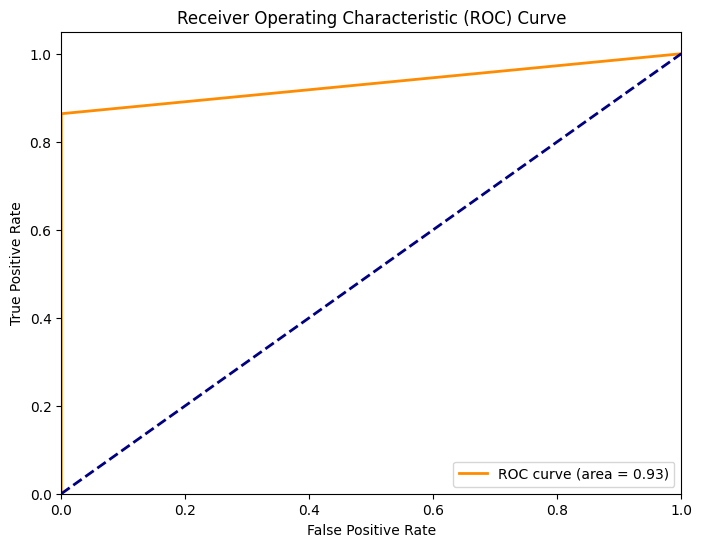

In [45]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [48]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.92      0.86      0.89        66

    accuracy                           0.87       104
   macro avg       0.85      0.87      0.86       104
weighted avg       0.87      0.87      0.87       104



In [49]:
print(roc_curve(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

(array([0.        , 0.13157895, 1.        ]), array([0.        , 0.86363636, 1.        ]), array([inf,  1.,  0.]))
0.8653846153846154


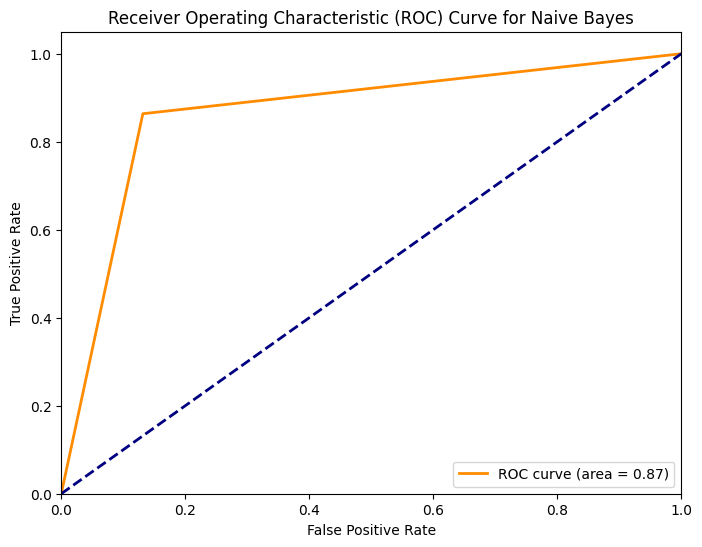

In [50]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

#SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [53]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.97      0.91      0.94        66

    accuracy                           0.92       104
   macro avg       0.91      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



In [54]:
print(roc_curve(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

(array([0.        , 0.05263158, 1.        ]), array([0.        , 0.90909091, 1.        ]), array([inf,  1.,  0.]))
0.9230769230769231


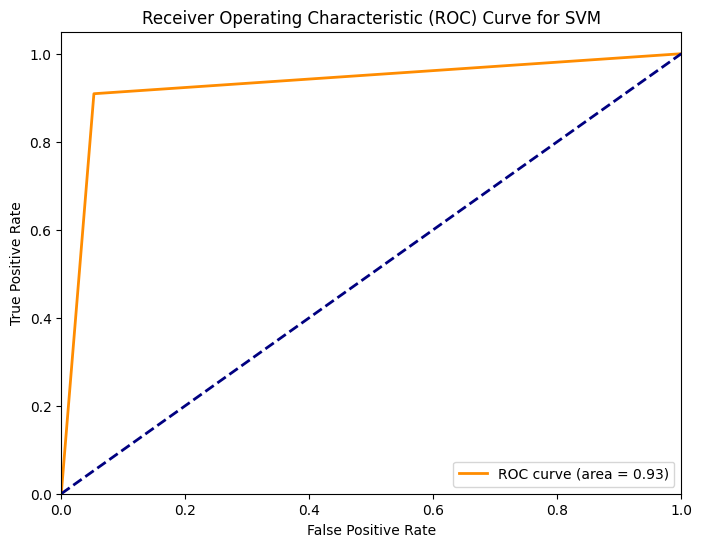

In [55]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()